$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{example}{\textbf{Example: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{v}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
\newcommand\dels[2]{\frac{\partial #1}{\partial #2}} 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Applications of ordinary differential equations


## Pendulum

![pendulum](https://upload.wikimedia.org/wikipedia/commons/6/66/Pendulum_gravity.svg)

A pendulum is defined by the following equation:
$$
L \theta '' = -g \sin \theta
$$

with:
* $L$: length of the pendulum ($l$ in the image)
* $\theta$: angle between the vertical axis and the pendulum
* $g$: gravitational force

### Equilibrium

Notice that when $\theta = 0$, then $\theta'' = 0$.
Thus $\theta = 0 $ is an **equilibrium**, _ie_ a value where $\theta$ remains constant.
This makes intuitively sense because a pendulum that is at the resting state shouldn't move.

Less intuitively, we would also see that $\theta = \pi$ is also an equilibrium.

However, from our physical understanding, we know that the former is a **stable equilibrium** while the latter is **unstable**.

More precisely, it a stable equilibrium is one where a small variation from it would lead to a small change;
while for an unstable one, a small variation would lead to a large change.

Now we shall investigate it mathematically.

When $\theta = \pi$, the Taylor expansion of it is:
$$
f(\theta) = f(\pi) + f'(\pi)(\theta - \pi) + \frac{1}{2} f''(\pi) (\theta - \pi)^2 + \dots
$$

Therefore:
$$
\sin \theta = 0 + (-1)(\theta - \pi) - 0 + \dots \approx \pi - \theta
$$

Thus, our equation becomes:

$$
L \theta '' = -g \sin \theta \approx -g (\theta - \pi)
$$

Using the substitution of $u = \theta - \pi, u'' = \theta''$, we get:
$$
L u '' = -g u
$$

Solving this using our [known methods](./introduction.ipynb#Polynomial), we get:
$$
u = Ae^{\sqrt \frac{g t}{L}} + B e^{-\sqrt \frac{g t}{L}}
$$

Hence:
$$
\theta = Ae^{\sqrt \frac{g t}{L}} + B e^{-\sqrt \frac{g t}{L}} + \pi
$$

For $\theta_0 = \pi$, we get that $A = -B$ and thus:
$$
\theta = Ae^{\sqrt \frac{g t}{L}} - A e^{-\sqrt \frac{g t}{L}} + \pi
$$


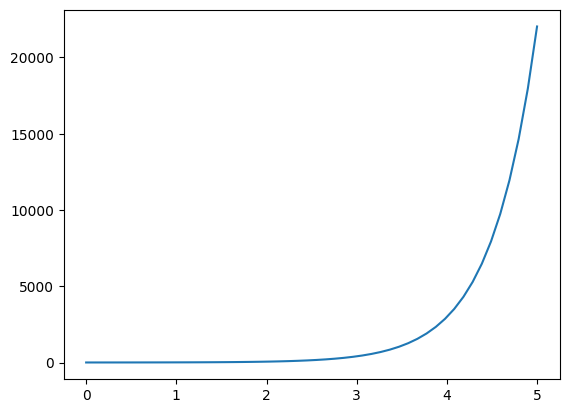

In [2]:
ts = np.linspace(0, 5)
A = 1
g = 10
L = 5

plt.plot(ts, A * np.exp(g * ts / L) - A * np.exp(- g * ts / L) + np.pi)
plt.show();

Due to the exponential, $\theta$ blows up, hence the equilibrium is **not stable around $\theta = \pi$**.

---

Now when $\theta = 0$, we follow similar steps, and arrive at:
$$
L\theta '' \approx -g \theta
$$

We rewrite it as the form:
$$
\theta'' = -\omega ^2 \theta
$$
where $\omega = \sqrt \frac{g}{L}$.

It solution is of the form:
$$
C \cos(\omega t) + D \sin (\omega t)
$$

($\omega$ is known as the **angular frequency** of the pendulum)

Using the trigonometric identity that:
$$
C \cos (x) + D \sin(x) =  \sqrt{C^2 + D^2} \cos (x -\arctan \frac{D}{C})
$$

it further simplifies to:
$$
\theta = A \cos (\omega t - \delta)
$$

for $\theta_0 = 0, \delta = \frac{\pi}{2}$


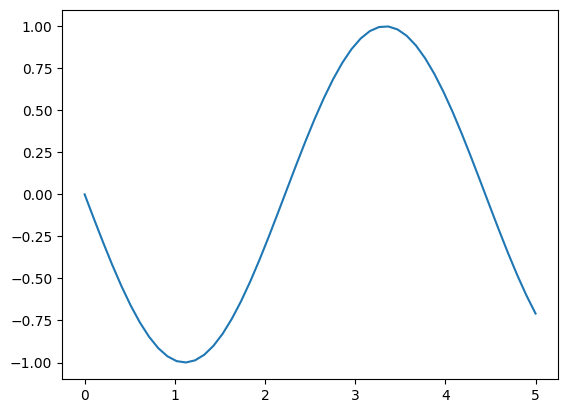

In [3]:
ts = np.linspace(0, 5)
A = 1
g = 10
L = 5
omega = np.sqrt(g/L)
delta = np.pi/2

plt.plot(ts, A * np.cos(omega * ts + delta))
plt.show();

Since the function is bounded by the cosine, the $\theta$ does not blow up and thus it is stable.




## Spring

Suppose we have a mass that is moving horizontally.
It is attached to the end of a spring which exerts a force, $F = -kx$,
where $x$ is the amount of extension of the spring and $k$ is the spring constant.

This is also known as Hooke's Law.

By Newton's law, the force of the spring and that of the mass should cancel out, giving us:
$$
mx'' = -kx \Rightarrow x'' = - \omega ^2 x
$$

where $\omega = \sqrt{\frac{k}{m}}$ is the **natural frequency** of the system.

Notice that this has the same form as the [pendulum](./Pendulum) (_aka_ simple harmonic oscillator), 
thus the general solution is the form:
$$
x = A \cos (\omega t - \delta)
$$

Now we add a motor to the mass which exerts a force periodically at $F_0 \cos (\alpha t)$,
where $F_0$ is the amplitude of the force and $\alpha$ is the frequency.

Our equation now become:
$$
m x'' = F_0 \cos \alpha t - kx
$$

If we further restrict $F_0 \neq 0, x_0 = x_0' = 0$ (_ie_ the spring is relaxed and the mass is not moving initially), then it has the general solution of the form:
$$
x = \frac{2 F_0}{m(\alpha ^2 - \omega ^2)} 
\left(\sin \frac{(a - \omega)t}{2} \right)
\left(\sin \frac{(a + \omega)t}{2} \right)
$$

<details>
    <summary style="color: blue">$\text{Derivation}$ (Click to expand)</summary>
    <div style="background: aliceblue">
    We solve for $mz'' + kz = F_0 e^{i\alpha t}$ instead, for some complex function $z$.
    Using $z = Ce^{i\alpha t}$, we would arrive at:
    $$
    mC(i\alpha)^2 e^{i\alpha t} + Ck e^{i\alpha t} = F_0 e^{i\alpha t}
    \Rightarrow C = \frac{F_0}{k-m\alpha^2} = \frac{F_0}{m(\omega ^2 - \alpha^2)}
    $$
    Equating the real part, and using our simple harmonic oscillator equation, our general solution is of the form
    $$
    x = A \cos (\omega t - \delta) + \frac{F_0}{m(\omega ^2 - \alpha^2)} \cos (\alpha t)
    $$
    Setting $x_0 = x'_0 = 0$ will give us the following identities:
    $$
    A\cos(\delta) + \frac{F_0}{m(\omega ^2 - \alpha^2)} = 0 \quad
    A\omega \sin(\delta)  = 0 \\
    $$
    Since $F_0 \neq 0$, then $A \neq 0$, which means $\delta = 0$ and thus $A = -\frac{F_0}{m(\omega ^2 - \alpha^2)}$, which simplifies our solution to:
    $$
    x = \frac{F_0}{m(\omega ^2 - \alpha^2)} \left(\cos (\alpha t) - \cos(\omega t) \right)
    $$
    Using some trigonometric identity, we would arrive at our solution above.
    </div>
</details>

---

When $\alpha = 0$ (_ie_ our motor never acts), the system is simply a simple harmonic oscillator.

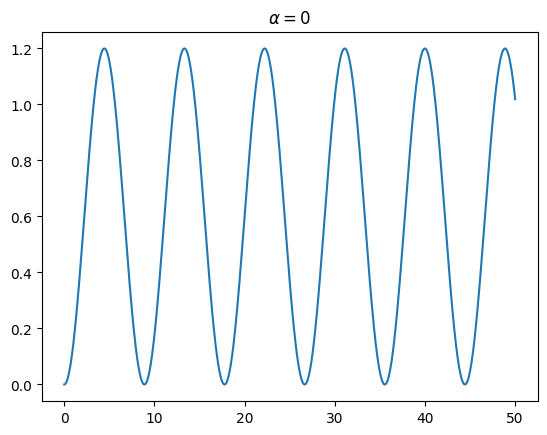

In [4]:
ts = np.linspace(0, 50, num=1000)
a = 0
k = 5
m = 10
F0 = 3
omega = np.sqrt(k/m)

plt.plot(ts, 2 * F0 / (m * (a**2 - omega**2)) * np.sin((a - omega) * ts / 2) * np.sin((a + omega) * ts / 2))
plt.title("$\\alpha = 0$")
plt.show();

Now when we add the motor in, we can somewhat visualize from the graph that the spring has another external periodic force acting on it.

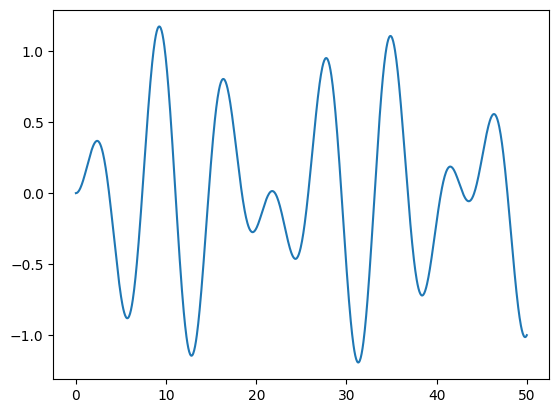

In [5]:
a = 1
k = 5
m = 10
F0 = 3
omega = np.sqrt(k/m)

plt.plot(ts, 2 * F0 / (m * (a**2 - omega**2)) * np.sin((a - omega) * ts / 2) * np.sin((a + omega) * ts / 2))
plt.show();

### Resonance

Notice that when $\alpha \to \omega$, then 
$$
\begin{align*}
\lim _ {\alpha \to \omega} x &= \frac{2 F_0}{m(\alpha ^2 - \omega ^2)} 
\left(\sin \frac{(a - \omega)t}{2} \right)
\left(\sin (\omega t) \right) \\
&= \frac{2 F_0}{m} \frac{1}{\alpha + \omega} \frac{1}{\alpha - \omega} 
\left(\sin \frac{(a - \omega)t}{2} \right)
\left(\sin (\omega t) \right) \\
&= \frac{2 F_0}{m(2\omega)} \frac{1}{\alpha - \omega}
\left(\sin \frac{(a - \omega)t}{2} \right)
\left(\sin (\omega t) \right) \\
&= \frac{F_0}{m \omega} \frac{t}{2} 
\left(\sin (\omega t) \right) \quad \text{L'Hopital rule} \\
&= \frac{F_0 t}{2m\omega} \sin (\omega t)
\end{align*}
$$

which increases without bound.

This is **resonance**, which happens when a force is applied to a system that matches its natural frequency.

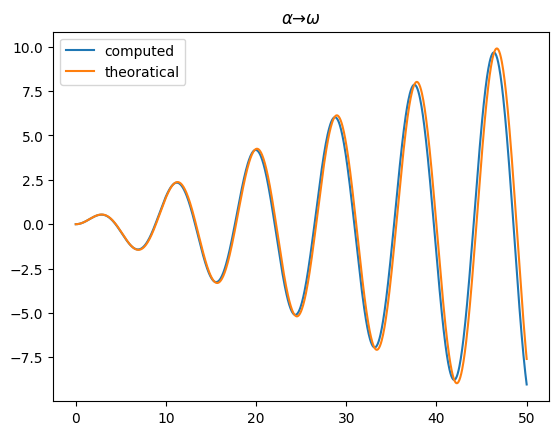

In [6]:
ts = np.linspace(0, 50, num=1000)
k = 5
m = 10
F0 = 3
omega = np.sqrt(k/m)
a = omega + 0.01

plt.plot(ts, 2 * F0 / (m * (a**2 - omega**2)) * np.sin((a - omega) * ts / 2) * np.sin((a + omega) * ts / 2), label="computed")
plt.plot(ts, F0 * ts / (2 * m * omega) * np.sin(omega * ts), label="theoratical")
plt.title("$\\alpha \\to \\omega$")
plt.legend();
plt.show();

## Conservation

Newton's 2nd law is expressed using time derivatives, _ie_ $\frac{d}{dt}$.
But we can also express it in terms of spatial derivative, _ie_ $\frac{d}{dx}$, using the following identity:

$$
\frac{1}{2} \frac{d}{dx} x'^2 = x' \frac{d x'}{d x} = \frac{d x}{d t} \frac{d x'}{d x} = x'' 
$$

For example, for the simple harmonic oscillator, we can express it as:
$$
\begin{gather*}
mx'' = -kx\\
\Rightarrow \frac{m}{2} \frac{d}{dx} x'^2 = -kx \\
\Rightarrow \int \frac{m}{2} \frac{d}{dx} x'^2 dx =\int  -kx dx \\
\Rightarrow \frac{m}{2} x'^2 = -\frac{1}{2} k x^2 + C \\
\Rightarrow C = \frac{1}{2} mx'^2 + \frac{1}{2} k x^2
\end{gather*}
$$

Notice that $\frac{1}{2} mx'^2$ is what we know as the kinetic energy,
and $\frac{1}{2} kx^2$ is the potential energy.

Their sum is equals to a constant, which we call the total energy.
The fact that the total energy is constant agrees with our understanding about energy conservation.





